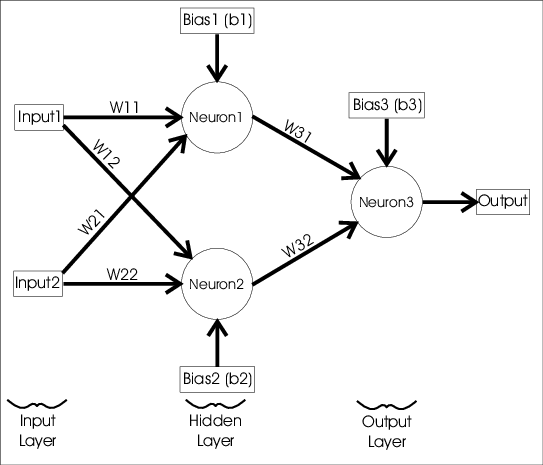

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

In [22]:
# layer configurations
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

# hidden layers random initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))

# output layers random initialization
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

print("Initial hidden weights: ",end='  ')
print(*hidden_weights)
print("Initial hidden biases: ",end='  ')
print(*hidden_bias)
print("Initial output weights: ",end='  ')
print(*output_weights)
print("Initial output biases: ",end='  ')
print(*output_bias)

Initial hidden weights:   [0.40141741 0.35032286] [0.53643358 0.15215139]
Initial hidden biases:   [0.4352663  0.31413252]
Initial output weights:   [0.10564913] [0.55728359]
Initial output biases:   [0.97460642]


In [23]:
# sigmoid function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [24]:
# sigmoid function derivative
def sigmoid_derivative(x):
    return x * (1 - x)

In [29]:
# parameter initializations
epochs = 100000
lr = 0.1

In [30]:
#Activation and Weight Training algorithm
errorappend=[]
for _ in range(epochs):
	#Forward Propagation at hidden layers
	hidden_layer_activation = np.dot(inputs,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)
    
	#Forward Propagation at output layers
	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)

	# error gradient at output layer
	error = expected_output - predicted_output
	#print(error.shape)
	errorsum=error[0] + error[1] + error[2] + error[3]
	errorappend.append(errorsum/4)
	#print(errorappend)
    
	error_gradient_output = error * sigmoid_derivative(predicted_output)
	error_hidden_layer = error_gradient_output.dot(output_weights.T)
	error_gradient__hidden = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

	#Updating Weights and Biases
	output_weights += hidden_layer_output.T.dot(error_gradient_output) * lr
	output_bias += np.sum(error_gradient_output,axis=0,keepdims=True) * lr
	hidden_weights += inputs.T.dot(error_gradient__hidden) * lr
	hidden_bias += np.sum(error_gradient__hidden,axis=0,keepdims=True) * lr

print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Final hidden weights: [4.96932342 6.96722002] [4.99660971 7.08899723]
Final hidden bias: [-7.64139303 -3.18610737]
Final output weights: [-11.7278168] [10.97090097]
Final output bias: [-5.1176339]

Output from neural network after 10,000 epochs: [0.00912289] [0.99229788] [0.99223725] [0.00792576]


In [31]:
arr = np.array(errorappend)
#print(arr)

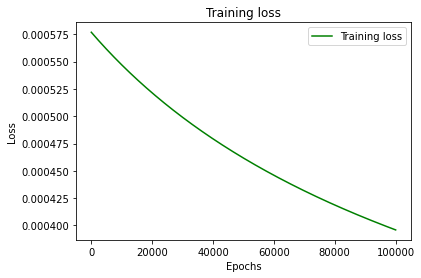

In [32]:
epochs = range(0,100000)
plt.plot(epochs, np.abs(arr), 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()